# Bay Area Boba Shops

## by Damien Ha

The dataset from this project is publicly available here https://www.kaggle.com/datasets/vnxiclaire/bobabayarea

Note: Some of this data is not current as of 2022. It was last updated in 2017, so ratings may have changed and some of the stores in the data are now closed. I preferred not to go to the trouble of identifying all closed shops and instead allow this data to be a general overview of pre-pandemic ratings

### Examining the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from plotly import express as px

In [2]:
df = pd.read_csv('bayarea_boba_spots.csv', index_col=0)

In [3]:
df.head()

id                   name  rating  \
0           99-tea-house-fremont-2          99% Tea House     4.5   
1                one-tea-fremont-2                One Tea     4.5   
2             royaltea-usa-fremont           Royaltea USA     4.0   
3  teco-tea-and-coffee-bar-fremont  TECO Tea & Coffee Bar     4.5   
4                  t-lab-fremont-3                  T-LAB     4.0   

                   address     city        lat        long  
0        3623 Thornton Ave  Fremont  37.562950 -122.010040  
1  46809 Warm Springs Blvd  Fremont  37.489067 -121.929414  
2       38509 Fremont Blvd  Fremont  37.551315 -121.993850  
3   39030 Paseo Padre Pkwy  Fremont  37.553694 -121.981043  
4       34133 Fremont Blvd  Fremont  37.576149 -122.043705

Since the store id is just a way to identify each unique store, let's drop that column and focus on other variables

In [4]:
df = df.drop(['id'], axis = 1)
df.head()

name  rating                  address     city        lat  \
0          99% Tea House     4.5        3623 Thornton Ave  Fremont  37.562950   
1                One Tea     4.5  46809 Warm Springs Blvd  Fremont  37.489067   
2           Royaltea USA     4.0       38509 Fremont Blvd  Fremont  37.551315   
3  TECO Tea & Coffee Bar     4.5   39030 Paseo Padre Pkwy  Fremont  37.553694   
4                  T-LAB     4.0       34133 Fremont Blvd  Fremont  37.576149   

         long  
0 -122.010040  
1 -121.929414  
2 -121.993850  
3 -121.981043  
4 -122.043705

In [5]:
df.shape

(603, 6)

In [6]:
df.describe()

rating         lat        long
count  603.000000  603.000000  603.000000
mean     3.772803   37.669654 -122.098491
std      0.508849    0.279631    0.196297
min      2.000000   37.236431 -122.543884
25%      3.500000   37.444003 -122.257910
50%      4.000000   37.661346 -122.062060
75%      4.000000   37.798808 -121.942845
max      5.000000   38.674630 -121.508610

In [7]:
df.dtypes

name        object
rating     float64
address     object
city        object
lat        float64
long       float64
dtype: object

In [8]:
df.isna().sum()

name       0
rating     0
address    6
city       0
lat        0
long       0
dtype: int64

There aren't too many NaN values and they're all in the address column. Longitude and latitude can still be used to identify location, so we'll proceed

### Analysis

Some of the boba locations in the data are likely chains with multiple locations, so let's see all the unique boba shops in the data

In [9]:
df.name.unique()

array(['99% Tea House', 'One Tea', 'Royaltea USA',
       'TECO Tea & Coffee Bar', 'T-LAB', 'Q-Tea Monster', 'Gong Cha',
       'Happy Lemon', 'Factory Tea Bar', 'Super Cue Cafe',
       'Milk and Honey Cafe', 'Tea Island',
       'Taro Taro Dessert & Tea House', 'i-Tea', 'Sharetea', 'uRbain tea',
       'MandRo Teahouse', 'Tea Six', 'Tata Teahouse', 'Tea Station',
       'Sno-Crave Tea House', 'Boba Queen', 'T4 Tea', 'Boba Fitt Drinks',
       'Sweet Home Cafe', 'Tea Era', 'Teaspoon', 'T4', 'My Delights',
       'Sno-Crave Teahouse', 'Tastea', 'CaFace', 'Tea Villa',
       'Mr Green Bubble', 'Pop Tea Bar', 'Joy 4 Tea', 'Sweet CoCo',
       'Icy Blue', 'TeaTop', 'Ten Ren Tea Co of Milpitas',
       'Fantasia Coffee & Tea', 'Tapioca Express', 'Boba Guys',
       'Wonderful Dessert & Cafe', 'Little Sweet',
       'Plentea - San Francisco', 'Steap Tea Bar', 'Purple Kow',
       'OMG Tea', 'Asha Tea House', 'InfiniTea', 'STEEP', 'Mr. T Cafe',
       'Tpumps', 'TJ Cups', 'Wondertea', 'The B

In [10]:
df.name.value_counts()

Quickly                   25
T4                        18
i-Tea                     16
Sharetea                  15
BAMBU                      9
                          ..
Cafe Taiwan                1
360 Crepes                 1
Tea Breeze                 1
LeTea                      1
Alohana Hawaiian Grill     1
Name: name, Length: 439, dtype: int64

There are 439 different Bay Area boba places in this data when we account for shops with multiple locations

In [11]:
df.city.value_counts()

San Jose         55
San Francisco    49
Fremont          34
San Mateo        26
Dublin           24
                 ..
Sacramento        1
Pacifica          1
El Sobrante       1
Hercules          1
Pinole            1
Name: city, Length: 69, dtype: int64

In [12]:
df.city.value_counts().head(10)

San Jose         55
San Francisco    49
Fremont          34
San Mateo        26
Dublin           24
Milpitas         21
San Leandro      21
Oakland          20
Santa Clara      19
Palo Alto        19
Name: city, dtype: int64

So there are 69 different cities with boba shops in this data, 10 with the most are San Jose, San Francisco, Fremont, San Mateo, Dublin, Milpitas, San Leandro, Oakland, Santa Clara and Palo Alto

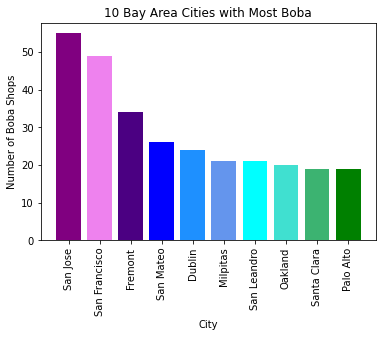

In [13]:
plt.bar(['San Jose', 'San Francisco', 'Fremont', 
         'San Mateo', 'Dublin', 'Milpitas', 
         'San Leandro', 'Oakland', 'Santa Clara', 
         'Palo Alto'], df.city.value_counts().head(10), color=['purple', 'violet', 'indigo', 
                                                               'blue', 'dodgerblue', 'cornflowerblue', 'aqua', 
                                                               'turquoise', 'mediumseagreen', 'green'])
plt.xlabel('City')
plt.xticks(rotation=('vertical'))
plt.ylabel('Number of Boba Shops')
plt.title('10 Bay Area Cities with Most Boba')
plt.show()

Let's see where our the bob shops are located

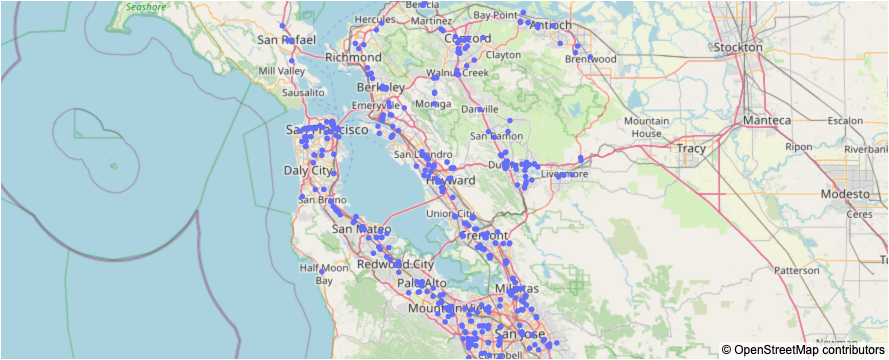

In [14]:
fig = px.scatter_mapbox(df, lat='lat', lon='long', hover_name='name', hover_data={'lat': False, 'long': False, 'city': True, 'address': True, 'rating': True})
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin=dict(l=1, r=1, t=1, b=1))
fig.show()

Where are the hotspots in the Bay Area for Boba?

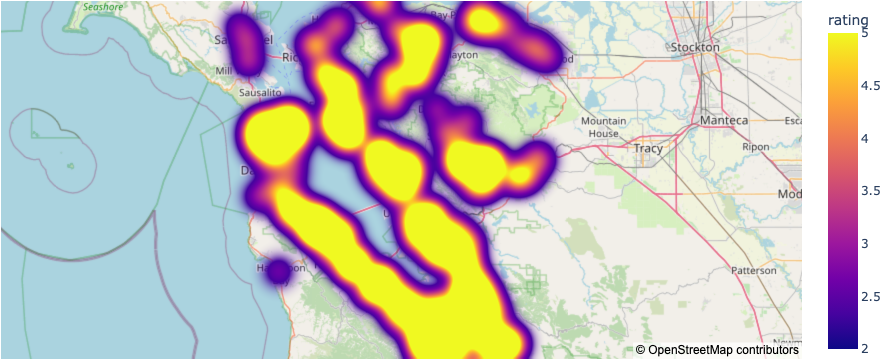

In [15]:
fig2 = px.density_mapbox(df, lat='lat', lon='long', z='rating', hover_name = 'name', hover_data={'lat': False, 'long': False, 'city': True, 'address': True, 'rating': True})
fig2.update_layout(mapbox_style='open-street-map')
fig2.update_layout(margin=dict(l=1, r=1, t=1, b=1))
fig2.show()

Now let's see exactly how good each of these places is individually

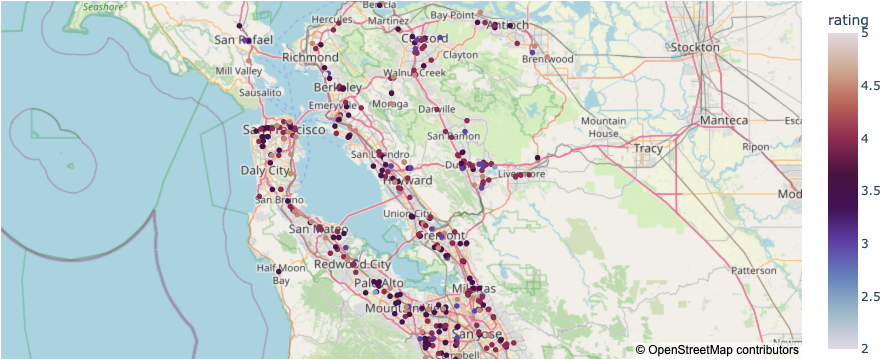

In [16]:
fig3 = px.scatter_mapbox(df, lat='lat', lon='long', color='rating', hover_name = 'name', 
                         hover_data={'lat': False, 'long': False, 'city': True, 'address': True, 'rating': True}, 
                         color_continuous_scale=px.colors.cyclical.Twilight)
fig3.update_layout(mapbox_style='open-street-map')
fig3.update_layout(margin=dict(l=1, r=1, t=1, b=1))
fig3.show()

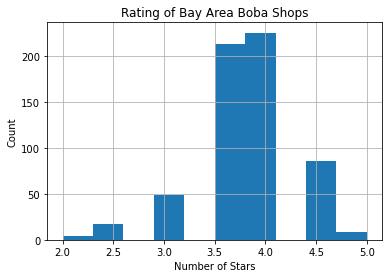

In [17]:
df['rating'].hist()
plt.title('Rating of Bay Area Boba Shops')
plt.xlabel('Number of Stars')
plt.ylabel('Count')
plt.show()

The vast majority of boba shops in the Bay Area are rated between 3.5 and 4 stars.